# Implementing micrograd 
#### This is a tutorial followed from Andrej Karpathy

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Lets understand the deratives and functions

In [16]:
def f(x):
    return 5*x**2 + 4*x - 1

f(5)

144

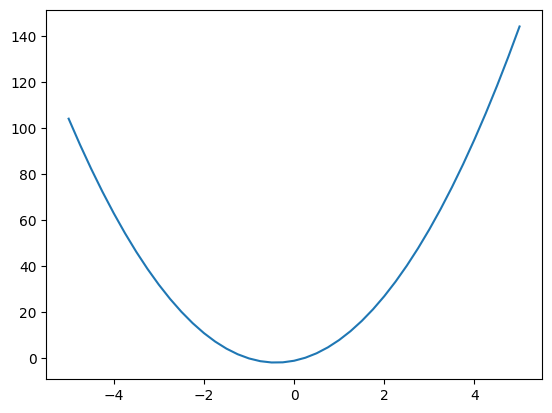

In [17]:
xs = np.arange(-5, 5.01, 0.25)
ys = f(xs)
plt.plot(xs, ys)

### Understanding derivatives 
- Here the taken function is $ 5x^2+4x-1 $
- So the  derivative of given function is $ 10x + 4 $

In [18]:
h = 0.000000001
x = 4
(f(x + h) - f(x))/h  #defination of derivative
#if you insert x = 4 into derivaitve you will get the nearly the same output

44.000003640576324

In [19]:
# the derivative will be zero at x = -2/5
x = -2/5
(f(x + h) - f(x))/h

-2.2204460492503128e-07

Understanding derivatives for multiple variables

In [20]:
a = 2.0
b = -3.0
c = 10

d1 = a*b + c
h = 0.00001
a += h

d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('derivative', (d2-d1)/h)

d1 4.0
d2 3.9999699999999994
derivative -3.000000000064062


### Implementing micrograd

In [21]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    #adding a addition operation for Value object
    def __add__(self, other):
        result = Value(self.data + other.data, (self, other), '+')
        return result

    #adding a multiplication operation for Value object
    def __mul__(self, other):
        result = Value(self.data * other.data, (self, other), '*')
        return result

In [22]:
a = Value(2.0, label='a')
b = Value(3.0, label='b')
a+b

Value(data=5.0)

In [23]:
c=Value(5.0, label='c')
a*b+c

Value(data=11.0)

In [24]:
d = a*b+c

In [25]:
d._prev

{Value(data=5.0), Value(data=6.0)}

In [26]:
d._op

'+'

In [27]:

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

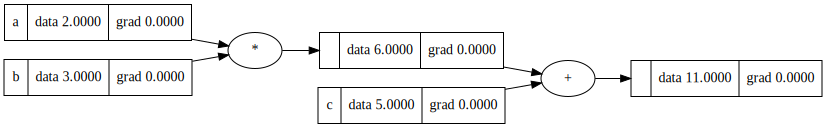

In [28]:
draw_dot(d)